In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 


In [3]:
df=pd.read_csv("Salary_Data.csv")

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


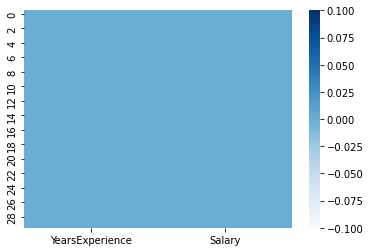

In [7]:
#there are no missing values detected in the data
sns.heatmap(df.isnull(),cmap="Blues")
plt.show()

In [8]:
df["YearsExperience"].fillna(df["YearsExperience"].mean())
df["Salary"].fillna(df["YearsExperience"].mean())

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


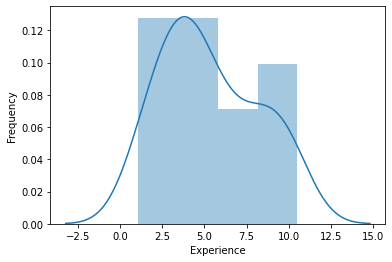

In [9]:
sns.distplot(df["YearsExperience"])
plt.ylabel("Frequency")
plt.xlabel("Experience")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


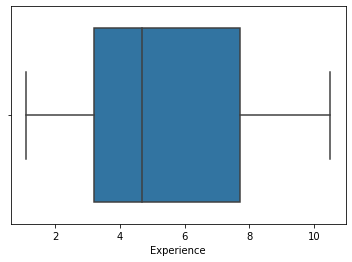

In [10]:
sns.boxplot(df["YearsExperience"])
plt.xlabel("Experience")
plt.show()

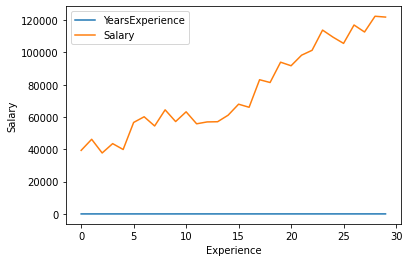

In [11]:
df.plot(kind="line")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


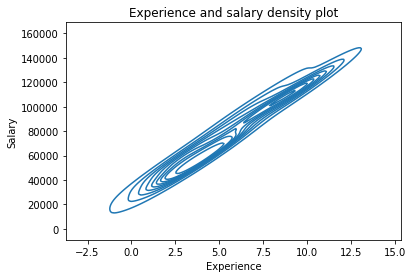

In [12]:
sns.kdeplot(df["YearsExperience"],df["Salary"])
plt.title("Experience and salary density plot")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

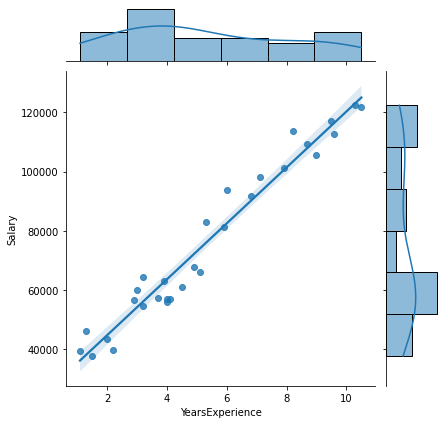

In [13]:
sns.jointplot(x="YearsExperience",y="Salary",data=df,kind="reg")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


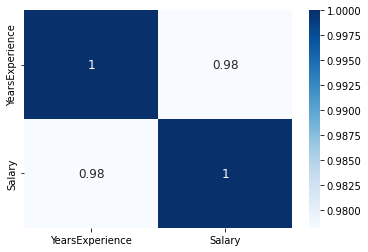

In [15]:
dfcorr = df.corr(method="pearson")
sns.heatmap(dfcorr, annot=True,annot_kws={"size":12}, cmap="Blues")
plt.show()

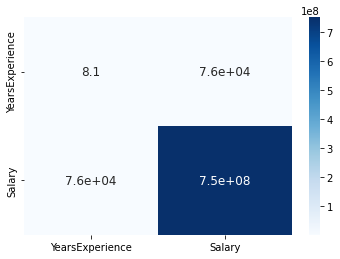

In [17]:
dfcov = df.cov()
sns.heatmap(dfcov, annot=True,annot_kws={"size":12}, cmap="Blues")
plt.show()


In [23]:
x = np.array(df["YearsExperience"])
y = np.array(df["Salary"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
from statsmodels.api import add_constant
import statsmodels.api as sm

In [41]:
x_constant = add_constant(x_train)
x_test = add_constant(x_test)

In [42]:
model =sm.OLS(y_train, x_constant).fit()

In [43]:
y_pred = model.predict(x_test)
pd.DataFrame(y_pred, columns = ["Predicted salary"])

,Predicted salary
0,40748.961841
1,122699.622956
2,64961.657170
3,63099.142145
4,115249.562855
5,107799.502753


In [44]:
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     352.1
Date:                Fri, 20 May 2022   Prob (F-statistic):           5.03e-15
Time:                        19:35:04   Log-Likelihood:                -242.89
No. Observations:                  24   AIC:                             489.8
Df Residuals:                      22   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.389e+04   1281.861     57.640      0.000    7.12e+04    7.65e+04
x1          2.405e+04   1281.861     18.765      0.000    2.14e+04    2.67e+04
==============================================================================
Omnibus:                        3.105   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.567
Skew:                           0.297   Prob(JB):                        0.457
Kurtosis:                       1.898   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""